In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold  
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
diabetes_data = pd.read_csv("C:\\Users\\1\\Desktop\\ML\\Logistic Regration(First)\\diabetes.csv")
diabetes_data.head()
diabetes_data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
x = diabetes_data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].values
y = diabetes_data["Outcome"].values
print (x.shape)
print (y.shape)
diabetes_data.info()
# diabetes_data.describe()
# Summary of the diabetes_dataset.
diabetes_data.describe().T

(768, 8)
(768,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


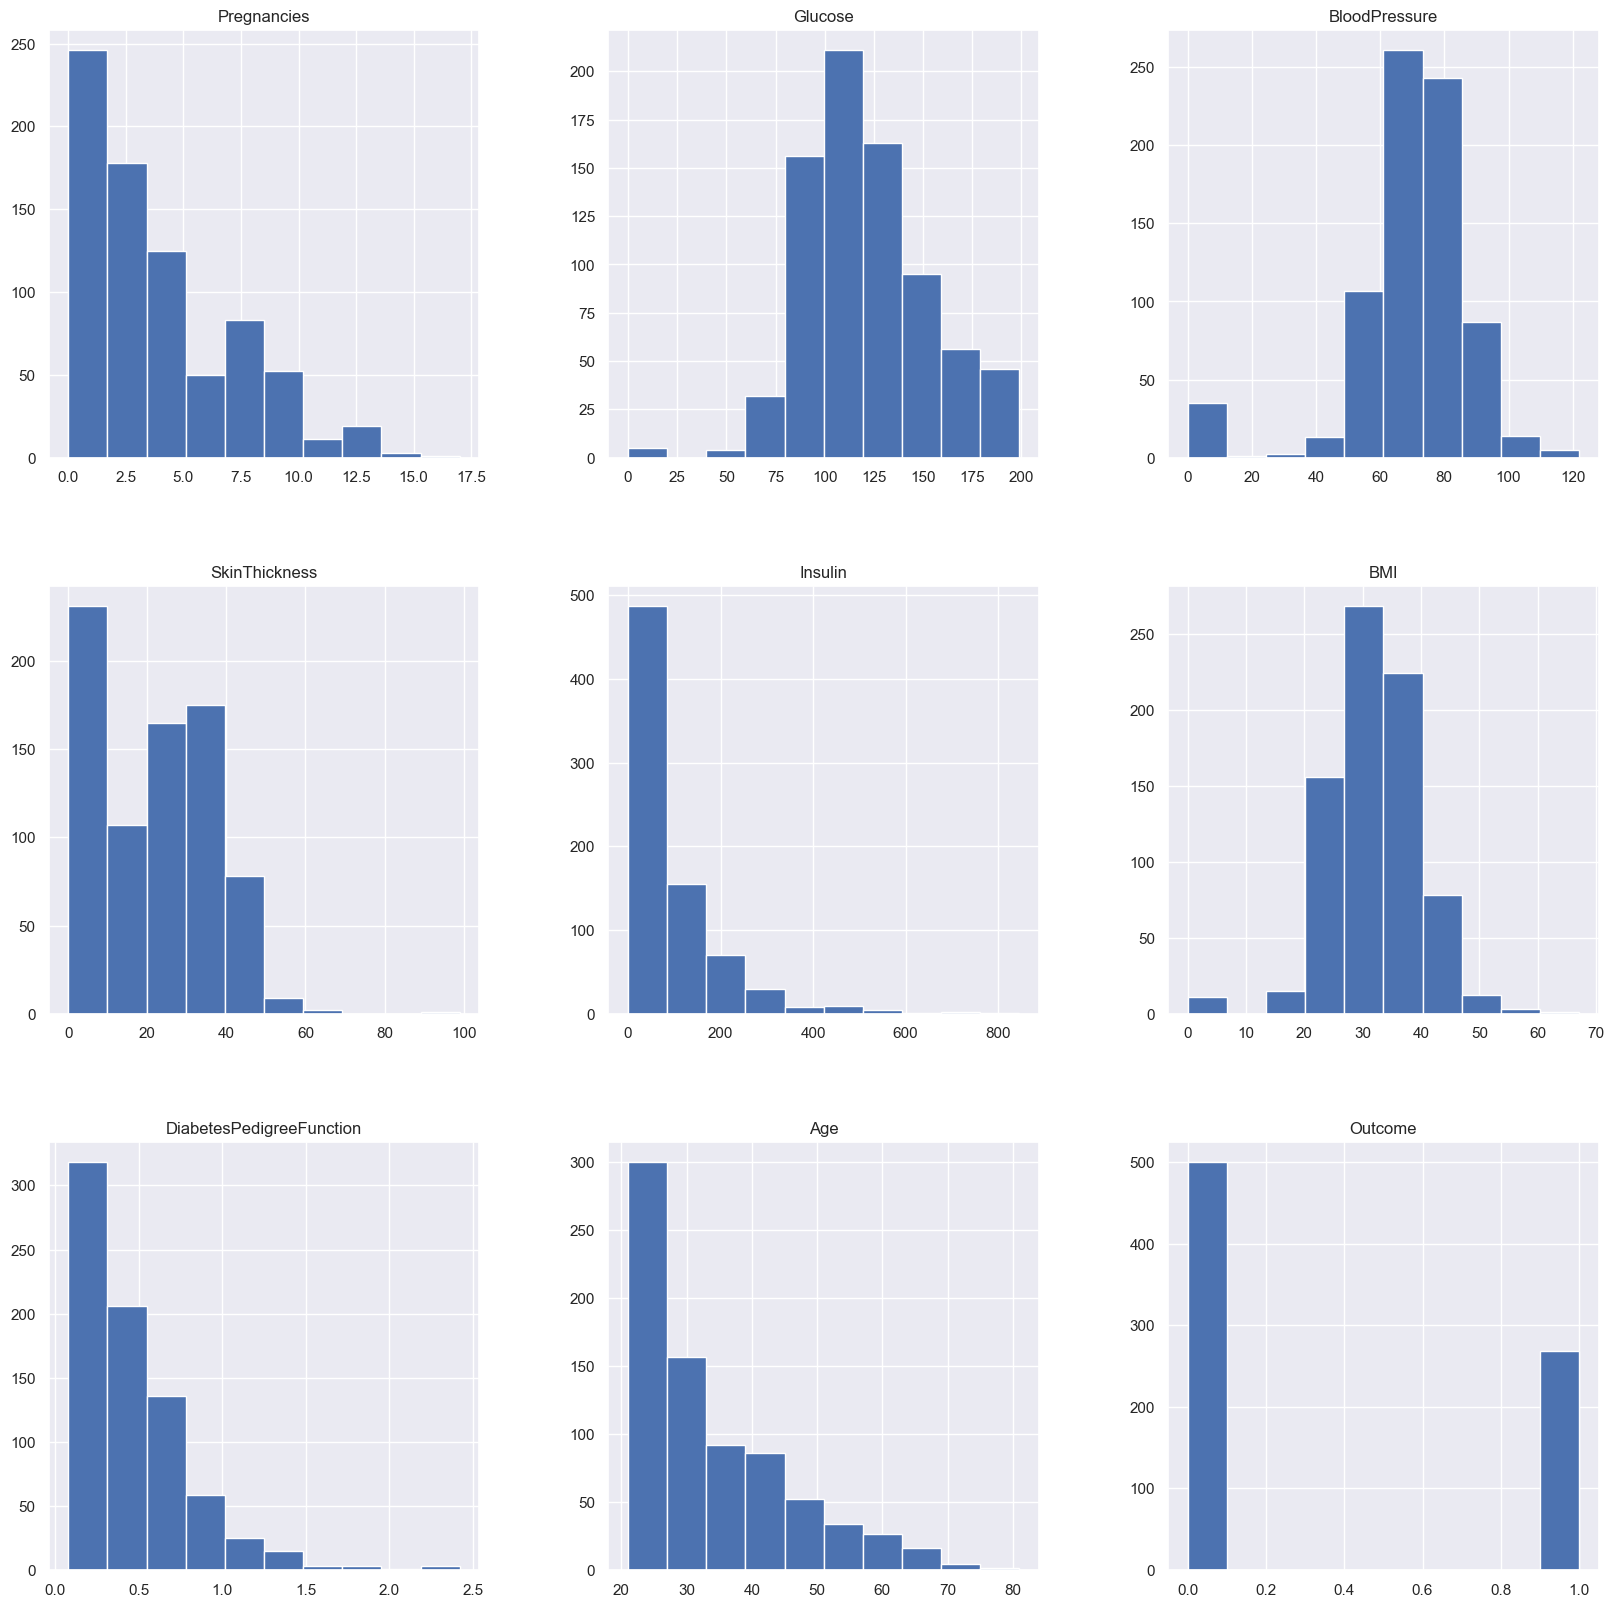

In [8]:
p = diabetes_data.hist(figsize = (20,20))

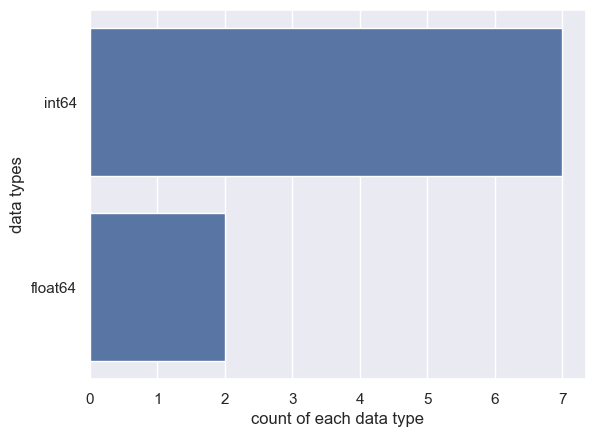

In [9]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=42)

print(len(x_train))
print(len(x_test))
print(len(x_valid))

537
116
115


In [11]:
np.count_nonzero(y_train == 0)

349

In [29]:
import numpy as np

class LogisticRegression:
    def __init__(self, l_rate=0.01, iterations=1000):
        self.l_rate = l_rate
        self.iterations = iterations

    # features scaling using z-score
    def scale(self, x):
        x_scaled = x - np.mean(x, axis=0)
        x_scaled /= np.std(x_scaled, axis=0)
        return x_scaled

    # sigmoid function
    def fit(self, x, y):
        self.losses = []
        self.theta = np.zeros(1 + x.shape[1])
        n = x.shape[0]

        for i in range(self.iterations):
            # linear model step 1
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])
            z = y_pred
            # sigmoid function step 2
            g_z = 1 / (1 + np.exp(-z))
            # cost function step 3
            epsilon = 1e-15  # small constant to avoid log(0) and log(1)
            cost = (1 / n) * (-y * np.log(g_z + epsilon) - (1 - y) * np.log(1 - g_z + epsilon))
            self.losses.append(cost)
            # derivative step 4
            d_theta1 = (1 / n) * np.dot(x.T, (g_z - y))
            d_theta0 = (1 / n) * np.sum(g_z - y)
            # update step 5
            self.theta[1:] -= self.l_rate * d_theta1
            self.theta[0] -= self.l_rate * d_theta0

        return self

    # predict function
    def predict(self, x):
        y_pred = self.theta[0] + np.dot(x, self.theta[1:])
        z = y_pred
        g_z = 1 / (1 + np.exp(-z))
        return [1 if i > 0.4 else 0 for i in g_z]


In [22]:
model = LogisticRegression()
model.fit(x_train,y_train)

In [23]:
print('theta',model.theta)

theta [-0.36657811  0.91280946 -0.16499225 -1.13015742 -0.21084215 -0.25934381
  0.07287333  0.02678925  0.13524085]


In [24]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [28]:
train_accurcy = metrics.accuracy_score(y_train,y_pred_train)
test_accurcy = metrics.accuracy_score(y_test,y_pred_test)

print ('train_accurcy',train_accurcy)
print ('test_accurcy',test_accurcy)


train_accurcy 0.6499068901303539
test_accurcy 0.6293103448275862


In [30]:
# evaluate using cross validation
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle=True, random_state=1)
train_accs , test_accs = [] , []

for train_index, test_index in kfold.split(x,y):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_accs.append(metrics.accuracy_score(y_train,y_pred_train)*100)
    test_accs.append(metrics.accuracy_score(y_test,y_pred_test)*100)
    

In [33]:
ava_train_acc = 0
ava_test_acc = 0

print("\t train_accs","\t","\t","test_accs")
for i in range(num_splits):
    print(i,"\t",train_accs[i],"\t",test_accs[i])
    ava_train_acc += train_accs[i] / num_splits
    ava_test_acc += test_accs[i] / num_splits

print("ava_train_acc",ava_train_acc,"\t",ava_test_acc)

	 train_accs 	 	 test_accs
0 	 42.508143322475576 	 40.25974025974026
1 	 65.47231270358306 	 64.93506493506493
2 	 65.30944625407166 	 63.63636363636363
3 	 49.75609756097561 	 46.40522875816993
4 	 67.96747967479675 	 55.55555555555556
ava_train_acc 58.20269590318053 	 54.158390628978864
